In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as NewsDetPd
import matplotlib.pyplot as Newsplt
import seaborn as Newsbrn
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')

In [3]:
News_Detect1 = NewsDetPd.read_csv("/content/drive/MyDrive/Colab Notebooks/921458/Code/fakeNews.csv")
News_Detect1

,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Binary Label
0,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,2/7/20,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0
...,...,...,...,...,...,...,...,...,...,...,...
3790,6/23/20,https://www.poynter.org/?ifcn_misinformation=b...,Bill Gates said that the COVID-19 vaccine wil...,Europe,Spain,The new RNA and DNA vaccine candidates are ex...,Social Media and Websites,https://www.newtral.es/bill-gates-vacuna-coron...,Newtral.es,FALSE,0
3791,6/23/20,https://www.poynter.org/?ifcn_misinformation=c...,COVID-19 vaccine candidates will insert micro...,Europe,Spain,The hoax comes from a misinterpretation of a ...,Whatsapp and Facebook,https://www.newtral.es/bulo-vacuna-coronavirus...,Newtral.es,FALSE,0
3792,6/23/20,https://www.poynter.org/?ifcn_misinformation=a...,An image claims that chroma screen panels are...,Europe,Spain,The image has been manipulated. The real one ...,Social Media,https://www.newtral.es/bulo-croma-inventar-mue...,Newtral.es,FALSE,0
3793,6/23/20,https://www.poynter.org/?ifcn_misinformation=a...,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",United States,United States,Alexandria Ocasio-Cortez didn't tweet this.,Viral image,https://www.politifact.com/factchecks/2020/jun...,PolitiFact,FALSE,0


In [4]:
print("Fake News Features of Covid19:\n", News_Detect1.columns)
print("\nFake News Output of Covid19:\n", News_Detect1['Binary Label'].value_counts())

#==== Research needs only 'Text' and 'Binary Label' columns
News_Detect1 = News_Detect1[['Text', 'Binary Label']]

#==== Rename 'Binary Label' to 'Label'
News_Detect1.rename(columns={'Binary Label': 'Label'}, inplace=True)
print(News_Detect1)

Fake News Features of Covid19:
 Index(['Date Posted', 'Link', 'Text', 'Region', 'Country', 'Explanation',
       'Origin', 'Origin_URL', 'Fact_checked_by', 'Poynter_Label',
       'Binary Label'],
      dtype='object')

Fake News Output of Covid19:
 Binary Label
0    3795
Name: count, dtype: int64
                                                   Text  Label
0       Tencent revealed the real number of deaths.\t\t      0
1      Taking chlorine dioxide helps fight coronavir...      0
2      This video shows workmen uncovering a bat-inf...      0
3      The Asterix comic books and The Simpsons pred...      0
4      Chinese President Xi Jinping visited a mosque...      0
...                                                 ...    ...
3790   Bill Gates said that the COVID-19 vaccine wil...      0
3791   COVID-19 vaccine candidates will insert micro...      0
3792   An image claims that chroma screen panels are...      0
3793   Alexandria Ocasio-Cortez tweeted, "It's vital...      0
3794   T

In [5]:
News_Detect2 = NewsDetPd.read_csv("/content/drive/MyDrive/Colab Notebooks/921458/Code/trueNews.csv")
News_Detect2

,Date Posted,Link,Text,Region,Username,Publisher,Label
0,2/11/20,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,the_hindu,The Hindu,1
1,2/12/20,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,ndtv,NDTV,1
2,2/12/20,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,the_hindu,The Hindu,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,indiatoday,IndiaToday,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,the_hindu,The Hindu,1
...,...,...,...,...,...,...,...
3788,6/30/20,https://twitter.com/ReutersUK/status/127789851...,Global COVID-19 prevention trial of hydroxychl...,Europe,reutersuk,Reuters UK,1
3789,6/30/20,https://twitter.com/ReutersUK/status/127798902...,Bavaria's free COVID-19 test for all splits Ge...,Europe,reutersuk,Reuters UK,1
3790,6/30/20,https://twitter.com/ReutersUK/status/127787577...,Britain locks down city of Leicester after COV...,Europe,reutersuk,Reuters UK,1
3791,6/30/20,https://twitter.com/ReutersUK/status/127778649...,UK imposes lockdown on city of Leicester to cu...,Europe,reutersuk,Reuters UK,1


In [6]:
#==== Research needs only 'Text' and '' columns
News_Detect2 = News_Detect2[['Text', 'Label']]
print("Shape of Fake News: ", News_Detect1.shape)
print("Shape of True News: ", News_Detect2.shape)
News_Detect = NewsDetPd.concat([News_Detect1, News_Detect2], ignore_index=True)
print("\nFake and True News in Covid19:\n", News_Detect.head(3))
print("\nResearch Output for Covid19:\n", News_Detect['Label'].value_counts())

Shape of Fake News:  (3795, 2)
Shape of True News:  (3793, 2)

Fake and True News in Covid19:
                                                 Text  Label
0    Tencent revealed the real number of deaths.\t\t      0
1   Taking chlorine dioxide helps fight coronavir...      0
2   This video shows workmen uncovering a bat-inf...      0

Research Output for Covid19:
 Label
0    3795
1    3793
Name: count, dtype: int64


In [7]:
def handle_nulls_and_duplicates(News_Detect):

    # Display null value summary
    print("Null Values per Column in Covid19:")
    print(News_Detect.isnull().sum())
    print("\n")

    # Check and display duplicate rows
    duplicate_rows = News_Detect[News_Detect.duplicated()]
    print(f"Duplicate Rows of Covid19 (Count: {len(duplicate_rows)}):")
    print(duplicate_rows)
    print("\n")

    # Remove duplicate rows
    News_Detect = News_Detect.drop_duplicates()

    # Final summary
    print(f"Covid19 Data: {len(News_Detect)} rows remaining after dropping duplicates.")
    return News_Detect

# Handle nulls and duplicates
News_Detect = handle_nulls_and_duplicates(News_Detect)
News_Detect['Label'].value_counts()

News_Detect.to_csv('/content/drive/MyDrive/Colab Notebooks/921458/Code/ProcessedNews_Covid19.csv', index=False)
News_Detect

Null Values per Column in Covid19:
Text     0
Label    0
dtype: int64


Duplicate Rows of Covid19 (Count: 332):
                                                   Text  Label
18                Bill Gates predicted coronavirus.\t\t      0
29     Cats and dogs can be infected and can contami...      0
44     The coronavirus pandemic can be dramatically ...      0
56     China orders citizens to abandon/kill their p...      0
89     China seeks court's approval to kill 20,000 c...      0
...                                                 ...    ...
3740   Fewer than 100 people have died from COVID-19...      0
3761   "In a very real sense, (Oklahoma has) flatten...      0
3769   Coronavirus does not affect people with 'O+' ...      0
3777   This video of the Eiffel Tower shows a tribut...      0
5935  #Data | Click on the link below to track the t...      1

[332 rows x 2 columns]


Covid19 Data: 7256 rows remaining after dropping duplicates.


,Text,Label
0,Tencent revealed the real number of deaths.\t\t,0
1,Taking chlorine dioxide helps fight coronavir...,0
2,This video shows workmen uncovering a bat-inf...,0
3,The Asterix comic books and The Simpsons pred...,0
4,Chinese President Xi Jinping visited a mosque...,0
...,...,...
7583,Global COVID-19 prevention trial of hydroxychl...,1
7584,Bavaria's free COVID-19 test for all splits Ge...,1
7585,Britain locks down city of Leicester after COV...,1
7586,UK imposes lockdown on city of Leicester to cu...,1


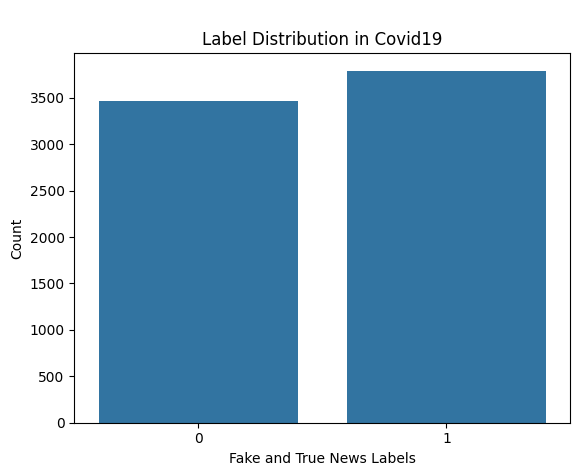

In [8]:
#===== Visualizing Target Feature 'Label'
Newsbrn.countplot(x='Label', data=News_Detect)
Newsplt.title('\nLabel Distribution in Covid19')
Newsplt.xlabel('Fake and True News Labels')
Newsplt.ylabel('Count')
Newsplt.show()

In [9]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [10]:
!pip install --upgrade numpy gensim
!pip install numpy==1.23.0 gensim==4.1.2
!pip install --upgrade pip setuptools wheel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 980.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 37.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-linux_x86_64.whl size=19730362 sha256=8007a3f684fd6146323c837cbd73e3d9eba675bace822a097e36f8d37ec22696
  Stored in directory: /root/.cache/pip/wheels/6d/36/1a/3ec6b85008bea3151efb003f5d41baa7bf4966cb43c1c2470b
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gens

In [1]:

import re as NewsDetRE
from nltk.tokenize import word_tokenize as NewsDet_WrdTok
from nltk.corpus import stopwords as NewsDet_StWords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models.fasttext import FastText as NewsDet_Ftext

import nltk as NewsDetNltk
NewsDetNltk.download('punkt')
NewsDetNltk.download('stopwords')
NewsDetNltk.download('wordnet')
NewsDetNltk.download('punkt_tab')

def newspreprocess(nws, stemming=True, lemmatization=False):
    nws = NewsDetRE.sub(r'https?://\S+|www\.\S+', '', nws)  #==== Removing URLs
    nws = NewsDetRE.sub(r'<.*?>', '', nws)  #===== Removing HTML tags
    nws = NewsDetRE.sub(r'[^a-zA-Z\s]', '', nws)  #===== Removing special characters
    nws = nws.lower()  #====== Converting lowercase

    #===== Tokenizing text
    tok_news = NewsDet_WrdTok(nws)

    #===== Removing stopwords
    news_stwords = set(NewsDet_StWords.words('english'))
    tok_news = [wrd for wrd in tok_news if wrd not in news_stwords]

    #====== Applying stemming or lemmatization
    if stemming:
        stemmer = PorterStemmer()
        tok_news = [stemmer.stem(wrd) for wrd in tok_news]
    elif lemmatization:
        lemmatizer = WordNetLemmatizer()
        tok_news = [lemmatizer.lemmatize(wrd) for wrd in tok_news]

    return tok_news

News_Detect['FastText_News'] = News_Detect['Text'].apply(lambda x: newspreprocess(str(x), stemming=True, lemmatization=False))
corpus = News_Detect['FastText_News'].tolist()

#====== Train FastText model
fasttext_model = NewsDet_Ftext(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4, sg=1)
fasttext_model.save("/content/drive/MyDrive/Colab Notebooks/921458/Code/fasttext_covid19.model")

#====== Analyze semantic and linguistic features (ex: retrieve vector for a word)
word = "vaccine"
if word in fasttext_model.wv:
    print(f"\nVector for the word '{word}':\n{fasttext_model.wv[word]}")
else:
    print(f"\nWord '{word}' not found in the FastText vocabulary.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NameError: name 'News_Detect' is not defined

In [ ]:
News_Detect

In [ ]:
News_Detect = News_Detect[['FastText_News', 'Label']]
News_Detect.to_csv('/content/drive/MyDrive/Colab Notebooks/921458/Code/FastTextNews_Covid19.csv', index=False)
News_Detect